In [ ]:
#LOGISTIC REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset     
df = pd.read_csv(r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\Train_dataset.csv")

# Define features and target variable
X = df.drop('IncidentGrade', axis=1)  
y = df['IncidentGrade']  

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,
                                                           stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)

# Initialize logistic regression
logreg = LogisticRegression(solver='liblinear')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate the best model on validation data
y_pred = best_logreg.predict(X_valid_scaled)

# Print results
print("Best Parameters:")
print(grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64     11720
           1       0.81      0.57      0.67     13464
           2       0.94      0.97      0.96    126942

    accuracy                           0.91    152126
   macro avg       0.80      0.73      0.76    152126
weighted avg       0.91      0.91      0.91    152126

Confusion Matrix:
[[  7707   1120   2893]
 [  1392   7632   4440]
 [  3080    639 123223]]


DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Load the dataset
df = pd.read_csv(r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\Train_dataset.csv")

# Define features and target variable
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)

# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'criterion': ['gini', 'entropy'],  # Measure for quality of split
    'splitter': ['best', 'random'],  # The strategy used to choose the split at each node
    'max_depth': [5, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_distributions, 
                                   n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, 
                                   verbose=1, random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_dtree = random_search.best_estimator_

# Evaluate the best model on validation data
y_pred = best_dtree.predict(X_valid_scaled)

# Print results
print("Best Parameters:")
print(random_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\nandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
195 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Best Parameters:
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     11720
           1       0.89      0.89      0.89     13464
           2       0.99      0.98      0.99    126942

    accuracy                           0.96    152126
   macro avg       0.89      0.91      0.90    152126
weighted avg       0.97      0.96      0.97    152126

Confusion Matrix:
[[ 10072    793    855]
 [   944  12016    504]
 [  1634    630 124678]]


RandomForestClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

# Load dataset
df = pd.read_csv(r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\Train_dataset.csv")

# Define features and target variable
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Split the dataset into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest Classifier 
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20,30],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2',None],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with StratifiedKFold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                      n_iter=20, scoring='f1_macro', cv=cv,
                                      n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV model
random_search_rf.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Evaluate the best model on validation data
y_pred = best_rf.predict(X_val)

# Print results
print("Best Parameters:")
print(random_search_rf.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Best Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'bootstrap': True}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11720
           1       0.97      0.98      0.97     13464
           2       1.00      1.00      1.00    126942

    accuracy                           0.99    152126
   macro avg       0.98      0.98      0.98    152126
weighted avg       0.99      0.99      0.99    152126

Confusion Matrix:
[[ 11415    217     88]
 [   182  13140    142]
 [   116    173 126653]]


xgboost

In [4]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from functools import partial

# Load dataset
df = pd.read_csv(r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\Train_dataset.csv")

# Define features and target variable
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Split the dataset into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create a custom fit method with early stopping using partial
fit_with_early_stopping = partial(
    xgb_model.fit,
    early_stopping_rounds=10,         
    eval_set=[(X_val, y_val)],        
    verbose=0                        
)


xgb_model.fit = fit_with_early_stopping

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (eta)
    'max_depth': [3, 6, 9],  # Maximum depth of each tree
    'subsample': [0.7, 0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with the custom fit method
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of iterations to sample from param_distributions
    scoring='f1_macro',   # Use F1 macro as the scoring metric
    cv=cv,  # StratifiedKFold for cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV with early stopping
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_xgb = random_search.best_estimator_

# Evaluate the best model on validation data
y_pred = best_xgb.predict(X_val)

# Print the best parameters and evaluation results
print("Best Parameters:")
print(random_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11720
           1       0.97      0.98      0.97     13464
           2       1.00      1.00      1.00    126942

    accuracy                           0.99    152126
   macro avg       0.98      0.98      0.98    152126
weighted avg       0.99      0.99      0.99    152126

Confusion Matrix:
[[ 11395    259     66]
 [   165  13133    166]
 [   119    195 126628]]


Comparison of all 4 algorithms

In [5]:
report = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy':[0.91,0.97,0.99,0.99],
    'Macro-F1 Score':[ 0.76, 0.91, 0.98, 0.97],
    'Precision': [0.80,0.90,0.98,0.97],
    'Recall': [0.73 ,0.92 ,0.98 ,0.97]

}

# Convert to DataFrame
df = pd.DataFrame(report)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

Comparison Table:
              Model  Accuracy  Macro-F1 Score  Precision  Recall
Logistic Regression      0.91            0.76       0.80    0.73
      Decision Tree      0.97            0.91       0.90    0.92
      Random Forest      0.99            0.98       0.98    0.98
            XGBoost      0.99            0.97       0.97    0.97

Best Model Based on Macro-F1 Score:
Model             Random Forest
Accuracy                   0.99
Macro-F1 Score             0.98
Precision                  0.98
Recall                     0.98
Name: 2, dtype: object


Choosing best algorithm

In [7]:
!pip install imbalanced-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from joblib import dump
from scipy.stats import randint

# Load dataset
df = pd.read_csv(r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\Train_dataset.csv")

# Define features and target variable
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Split the dataset into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier 
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50,75,100],  # Number of trees in the forest
    'max_depth': [10,15, 20,25],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with StratifiedKFold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                      n_iter=10, scoring='f1_macro', cv=cv,
                                      n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV model 
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best model from RandomizedSearchCV
best_rf = random_search_rf.best_estimator_

# Evaluate the best model on validation data
y_pred = best_rf.predict(X_val)

# Print results
print("Best Parameters:")
print(random_search_rf.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Save the best model to a pickle file
model_path = r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\rf_best_model.pkl"
dump(best_rf, model_path)
print(f"Model saved to {model_path}")

Best Parameters:
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'bootstrap': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     11720
           1       0.93      0.94      0.93     13464
           2       1.00      0.98      0.99    126942

    accuracy                           0.97    152126
   macro avg       0.90      0.96      0.93    152126
weighted avg       0.98      0.97      0.97    152126

Confusion Matrix:
[[ 11082    604     34]
 [   671  12676    117]
 [  2353    404 124185]]
Model saved to C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\rf_best_model.pkl


Feature Importance and Error Analysis

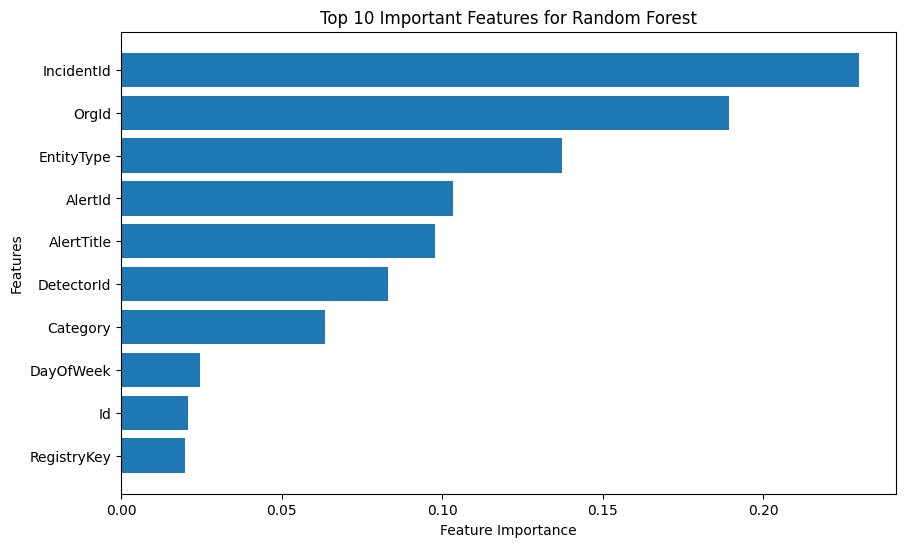

                   Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
416218  1236950582027    350       35994   239468           1    0.002278   
219464   627065228019    205       57298   159429           1    0.002278   
546508   670014900299    221       49462   448805           6    0.011390   
257149  1614907706641    211       80112   120272           6    0.011390   
351538   249108106075    205       53216   238451           1    0.002278   

        Category  EntityType  EvidenceRole  DeviceId  ...  ResourceIdName  \
416218         5           5             1     98799  ...            3586   
219464         5           5             1     98799  ...            3586   
546508         5           5             1     98799  ...            3586   
257149         5           5             1     98799  ...            3586   
351538         5           5             1     98799  ...            3586   

        OSFamily  Year     Month  DayOfWeek      Hour  State_0.0  City_0.0

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get feature importances from the best Random Forest model
importances = best_rf.feature_importances_

features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

# Identify misclassified samples
misclassified_idx = (y_val != y_pred)

# Extract the misclassified samples
misclassified_samples = X_val[misclassified_idx].copy()

# Display the first 5 misclassified samples
print(misclassified_samples.head(5))

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Evaluation of Selected Random Forest Model on Test Data

In [9]:
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Load the saved Random Forest model
model_path = r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\rf_best_model.pkl"
best_rf = load(model_path)

# Load the test dataset
test_data_path = r"C:/Users/nandh/OneDrive/Desktop/CAPSTONE4/Test_dataset.csv"
test_df = pd.read_csv(test_data_path)

# Separate features and target from test data
X_test = test_df.drop('IncidentGrade', axis=1)  
y_test = test_df['IncidentGrade']

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)

# Evaluate the model on the test set
print("\nClassification Report on Test Data:")
report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))

# Extract macro-F1 score, precision, and recall from the report
macro_f1 = report['macro avg']['f1-score']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']

print("\nMacro-F1 Score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))

# Confusion Matrix
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.63      0.94      0.76     24124
           1       0.85      0.75      0.80     21252
           2       1.00      0.97      0.98    303765

    accuracy                           0.95    349141
   macro avg       0.83      0.89      0.85    349141
weighted avg       0.96      0.95      0.96    349141


Macro-F1 Score: 0.85
Macro Precision: 0.83
Macro Recall: 0.89

Confusion Matrix on Test Data:
[[ 22719   1311     94]
 [  4552  15998    702]
 [  8732   1429 293604]]
